
# Problem Statement: Airbnb Hotel Booking Analysis.
The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and
tourism. Leading this revolution is Airbnb, Inc,, a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.
This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, 
exploratory analysis, and visualization techniques, the study aims to iluminate the dynamics of the city's lodging market. By discerning
factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's operations in one of the world's most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking to navigate the evolving landscape of short-term accommodation.

# QUESTIONS

1: This project is aimed to uncover some insights from the Airbnb Open Data. The following questions would be answered from the data.

2: What are the different property types in the Dataset?

3: Which neighborhood group has the highest number of listings?

4: Which neighborhoods group have the highest average prices for Airbnb listings?Is there a relationship between the construction year of property and price?

5: Who are the top 10 hosts by calculated host listing count?

6: Are hosts with verified identities more likely to receive positive reviews?

7: Is there a correlation between the price of a listing and its service fee?

8: What is the average review rate number (e.g. stars) for listings, and does it vary based on the neighborhood group and room type?

9: Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

# DATA WRANGLING
Data wrangling, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis. This
involves various tasks such as handling missing values, removing duplicates, and transforming data into a consistent format. Effective data
wrangling ensures that the data is reliable and ready for exploration, enabling meaningful insights to be derived from it.

# Import necessary libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline


# Load the dataset

In [41]:
df = pd.read_excel('1730285881-Airbnb_Open_Data.xlsx')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nDataset Info:")
df.info()

Dataset Shape: (102599, 26)

Column Names:
['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object 

In [42]:
# Display first few rows
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


# Data Wrangling
### Data wrangling involves preparing and cleaning raw data to make it suitable for analysis. This includes handling missing values, removing duplicates, and transforming data into a consistent format.

In [43]:
# Create a copy for cleaning
df_clean = df.copy()

print("Missing values before cleaning:")
missing_before = df_clean.isnull().sum()
print(missing_before[missing_before > 0])

Missing values before cleaning:
NAME                                 270
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules                        54843
license                           102597
dtype: int64


# Data Cleaning Steps

# 1. Clean price and service fee columns

In [44]:
def clean_currency(column):
    if column in df_clean.columns:
        df_clean[column] = (df_clean[column].astype(str)
                          .str.replace('$', '')
                          .str.replace(',', '')
                          .astype(float))
    return df_clean

# Apply cleaning to price and service fee
df_clean = clean_currency('price')
df_clean = clean_currency('service fee')

print("Price column sample after cleaning:")
print(df_clean['price'].head())
print("\nService fee column sample after cleaning:")
print(df_clean['service fee'].head())

Price column sample after cleaning:
0    966.0
1    142.0
2    620.0
3    368.0
4    204.0
Name: price, dtype: float64

Service fee column sample after cleaning:
0    193.0
1     28.0
2    124.0
3     74.0
4     41.0
Name: service fee, dtype: float64


# 2. Handle missing values in numerical columns

In [45]:
numerical_cols = ['price', 'service fee', 'minimum nights', 'number of reviews', 
                 'reviews per month', 'review rate number', 'calculated host listings count', 
                 'availability 365', 'Construction year']

for col in numerical_cols:
    if col in df_clean.columns:
        # Convert to numeric, coercing errors to NaN
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        # Fill missing values with median
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

print("Missing values in numerical columns after cleaning:")
print(df_clean[numerical_cols].isnull().sum())

Missing values in numerical columns after cleaning:
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
Construction year                 0
dtype: int64


# 3. Handle missing values in categorical columns

In [46]:
categorical_cols = ['host_identity_verified', 'neighbourhood group', 'neighbourhood', 
                   'room type', 'instant_bookable', 'cancellation_policy']

for col in categorical_cols:
    if col in df_clean.columns:
        df_clean[col].fillna(df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Unknown', inplace=True)

print("Missing values in categorical columns after cleaning:")
print(df_clean[categorical_cols].isnull().sum())

Missing values in categorical columns after cleaning:
host_identity_verified    0
neighbourhood group       0
neighbourhood             0
room type                 0
instant_bookable          0
cancellation_policy       0
dtype: int64


# 4. Remove duplicates

In [47]:
initial_count = len(df_clean)
df_clean = df_clean.drop_duplicates()
final_count = len(df_clean)

print(f"Duplicates removed: {initial_count - final_count}")
print(f"Final dataset shape: {df_clean.shape}")

Duplicates removed: 541
Final dataset shape: (102058, 26)


# Summary of cleaning process

In [48]:
print("DATA CLEANING SUMMARY")
print("=" * 50)
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")
print(f"Total missing values after cleaning: {df_clean.isnull().sum().sum()}")

DATA CLEANING SUMMARY
Original dataset shape: (102599, 26)
Cleaned dataset shape: (102058, 26)
Total missing values after cleaning: 173781


# Exploratory Data Analysis
### Now let's answer the specific questions from the project brief.

# 1. What are the different property types in the Dataset?

### Question 1: Different property types

1. DIFFERENT PROPERTY TYPES
Room types in the dataset:
room type
Entire home/apt    53429
Private room       46306
Shared room         2208
Hotel room           115
Name: count, dtype: int64


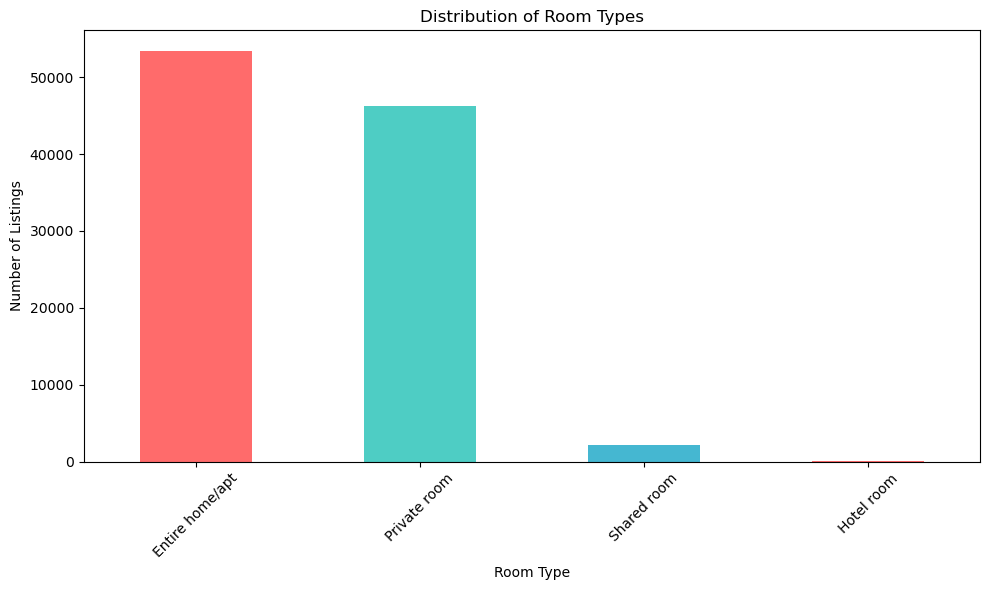

In [49]:
print("1. DIFFERENT PROPERTY TYPES")
print("=" * 40)

# Since there's no direct 'property_type' column, we'll analyze room types
if 'room type' in df_clean.columns:
    room_types = df_clean['room type'].value_counts()
    print("Room types in the dataset:")
    print(room_types)
    
    # Visualization
    plt.figure(figsize=(10, 6))
    room_types.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    plt.title('Distribution of Room Types')
    plt.xlabel('Room Type')
    plt.ylabel('Number of Listings')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 2. Which neighborhood group has the highest number of listings?

### Question 2: Neighborhood group with highest listings

2. NEIGHBORHOOD GROUP WITH HIGHEST LISTINGS
Listings by neighborhood group:
neighbourhood group
Manhattan        43586
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
brookln              1
manhatan             1
Name: count, dtype: int64

 Highest: Manhattan with 43586 listings (42.7%)


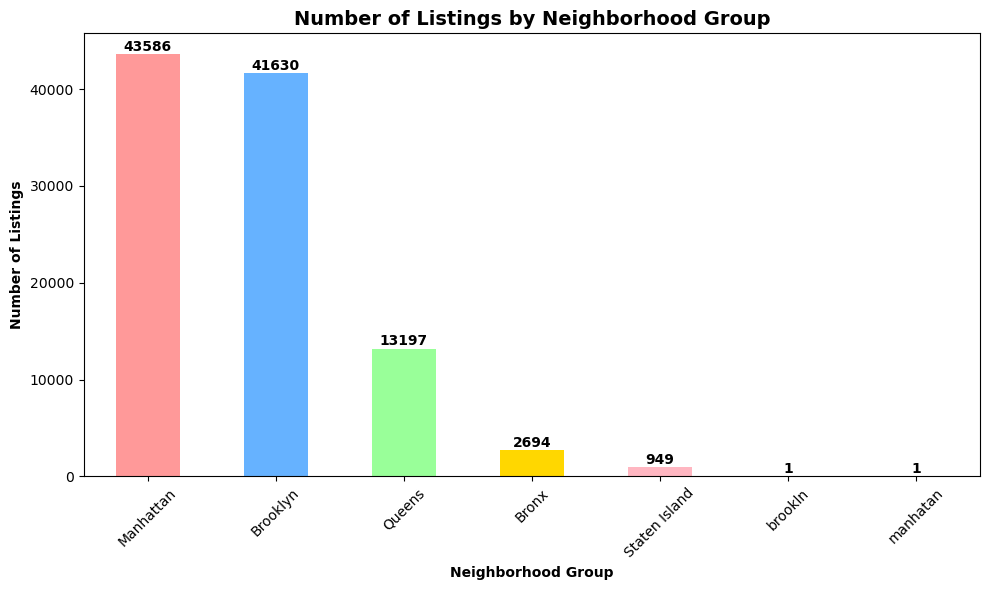

In [50]:
print("2. NEIGHBORHOOD GROUP WITH HIGHEST LISTINGS")
print("=" * 50)

if 'neighbourhood group' in df_clean.columns:
    neighborhood_counts = df_clean['neighbourhood group'].value_counts()
    print("Listings by neighborhood group:")
    print(neighborhood_counts)
    
    highest_neighborhood = neighborhood_counts.index[0]
    highest_count = neighborhood_counts.iloc[0]
    print(f"\n Highest: {highest_neighborhood} with {highest_count} listings ({highest_count/len(df_clean)*100:.1f}%)")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#FFB6C1']
    neighborhood_counts.plot(kind='bar', color=colors)
    plt.title('Number of Listings by Neighborhood Group', fontsize=14, fontweight='bold')
    plt.xlabel('Neighborhood Group', fontweight='bold')
    plt.ylabel('Number of Listings', fontweight='bold')
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for i, v in enumerate(neighborhood_counts):
        plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# 3. Which neighborhood groups have the highest average prices for Airbnb listings?

###  Question 3: Neighborhood groups with highest average prices

3. NEIGHBORHOOD GROUPS WITH HIGHEST AVERAGE PRICES
Average prices by neighborhood group:
                       mean  median     std
neighbourhood group                        
Queens               630.20   626.0  333.73
Bronx                627.76   630.0  323.39
Brooklyn             626.50   625.0  331.57
Staten Island        623.99   627.0  325.27
Manhattan            622.68   624.0  330.85
brookln              580.00   580.0     NaN
manhatan             460.00   460.0     NaN

 Highest average price: Queens with $630.20


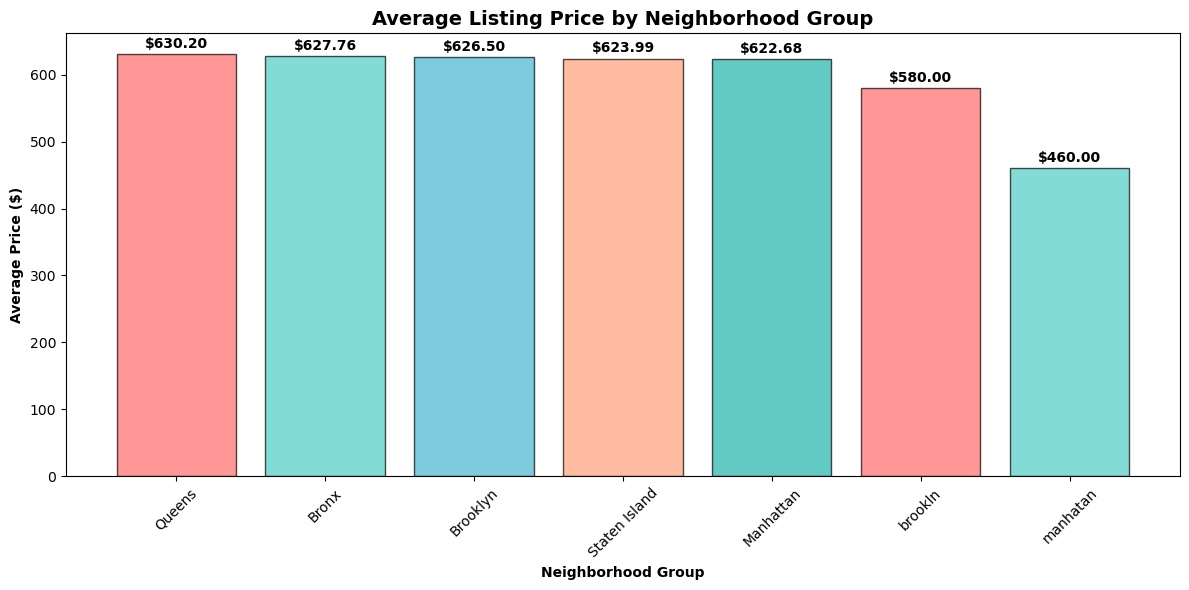

In [51]:
print("3. NEIGHBORHOOD GROUPS WITH HIGHEST AVERAGE PRICES")
print("=" * 60)

if 'neighbourhood group' in df_clean.columns and 'price' in df_clean.columns:
    avg_prices = df_clean.groupby('neighbourhood group')['price'].agg(['mean', 'median', 'std']).round(2)
    avg_prices_sorted = avg_prices.sort_values('mean', ascending=False)
    
    print("Average prices by neighborhood group:")
    print(avg_prices_sorted)
    
    highest_price_area = avg_prices_sorted.index[0]
    highest_avg_price = avg_prices_sorted['mean'].iloc[0]
    print(f"\n Highest average price: {highest_price_area} with ${highest_avg_price:.2f}")
    
    # Visualization
    plt.figure(figsize=(12, 6))
    
    # Bar plot for average prices
    bars = plt.bar(avg_prices_sorted.index, avg_prices_sorted['mean'], 
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#20B2AA'],
                   alpha=0.7, edgecolor='black')
    
    plt.title('Average Listing Price by Neighborhood Group', fontsize=14, fontweight='bold')
    plt.xlabel('Neighborhood Group', fontweight='bold')
    plt.ylabel('Average Price ($)', fontweight='bold')
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for bar, price in zip(bars, avg_prices_sorted['mean']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                f'${price:.2f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# 4. Is there a relationship between the construction year of property and price?

### Question 4: Relationship between construction year and price

4. RELATIONSHIP BETWEEN CONSTRUCTION YEAR AND PRICE
Correlation coefficient: -0.005
 Negative correlation: Older properties tend to have higher prices


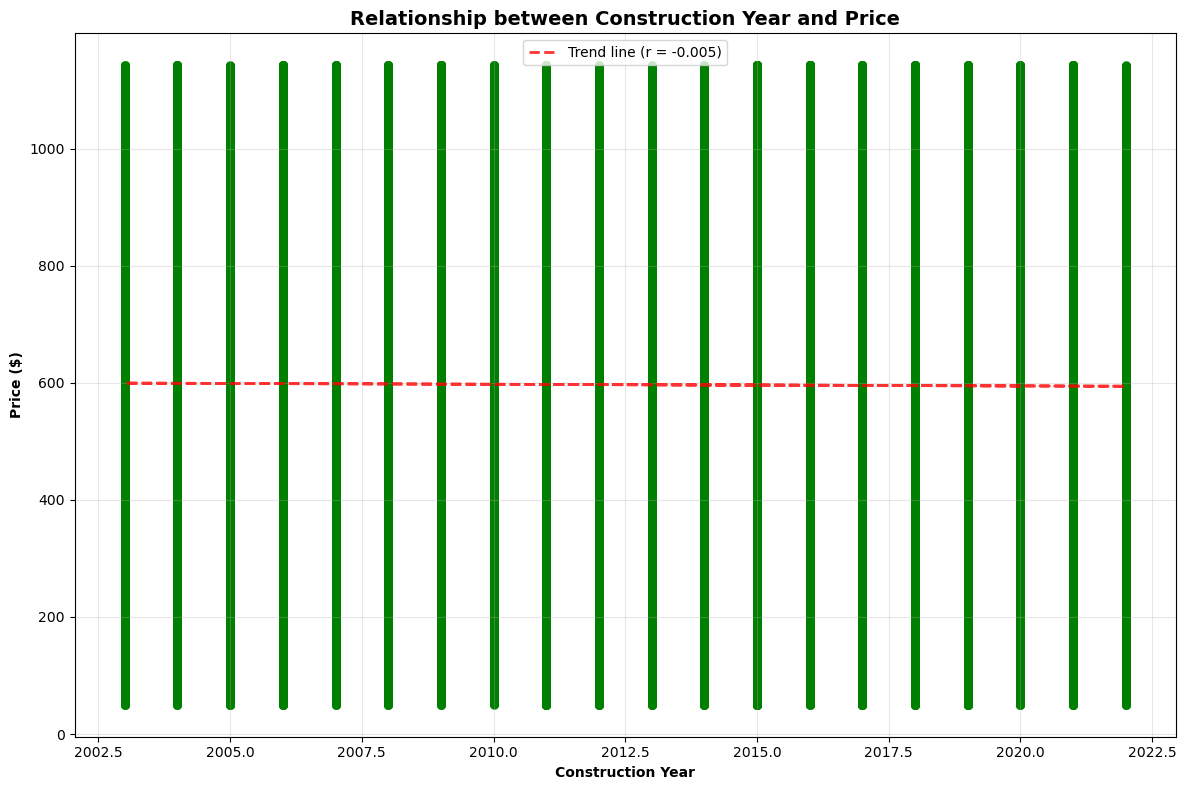

In [52]:
print("4. RELATIONSHIP BETWEEN CONSTRUCTION YEAR AND PRICE")
print("=" * 60)

if 'Construction year' in df_clean.columns and 'price' in df_clean.columns:
    # Remove extreme outliers for better visualization
    price_q95 = df_clean['price'].quantile(0.95)
    construction_filtered = df_clean[(df_clean['price'] <= price_q95) & 
                                   (df_clean['Construction year'] > 1900)]  # Filter unrealistic years
    
    # Calculate correlation
    correlation = construction_filtered['Construction year'].corr(construction_filtered['price'])
    print(f"Correlation coefficient: {correlation:.3f}")
    
    if correlation > 0:
        print(" Positive correlation: Newer properties tend to have higher prices")
    elif correlation < 0:
        print(" Negative correlation: Older properties tend to have higher prices")
    else:
        print(" No clear correlation between construction year and price")
    
    # Visualization
    plt.figure(figsize=(12, 8))
    
    # Scatter plot with trend line
    plt.scatter(construction_filtered['Construction year'], construction_filtered['price'], 
                alpha=0.6, color='green', s=30)
    
    # Add trend line
    z = np.polyfit(construction_filtered['Construction year'], construction_filtered['price'], 1)
    p = np.poly1d(z)
    plt.plot(construction_filtered['Construction year'], p(construction_filtered['Construction year']), 
             "r--", linewidth=2, alpha=0.8, label=f'Trend line (r = {correlation:.3f})')
    
    plt.title('Relationship between Construction Year and Price', fontsize=14, fontweight='bold')
    plt.xlabel('Construction Year', fontweight='bold')
    plt.ylabel('Price ($)', fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 5. Who are the top 10 hosts by calculated host listing count?

### Question 5: Top 10 hosts by calculated host listings count

5. TOP 10 HOSTS BY CALCULATED HOST LISTINGS COUNT
Top 10 hosts by number of listings:
 1. Blueground: 332.0 listings
 2. Sonder (NYC): 327.0 listings
 3. Eugene: 218.0 listings
 4. Karen: 208.0 listings
 5. Jeniffer: 186.0 listings
 6. Soya: 171.0 listings
 7. Kaz: 161.0 listings
 8. Hiroki: 152.0 listings
 9. Momoyo: 126.0 listings
10. Shogo: 125.0 listings


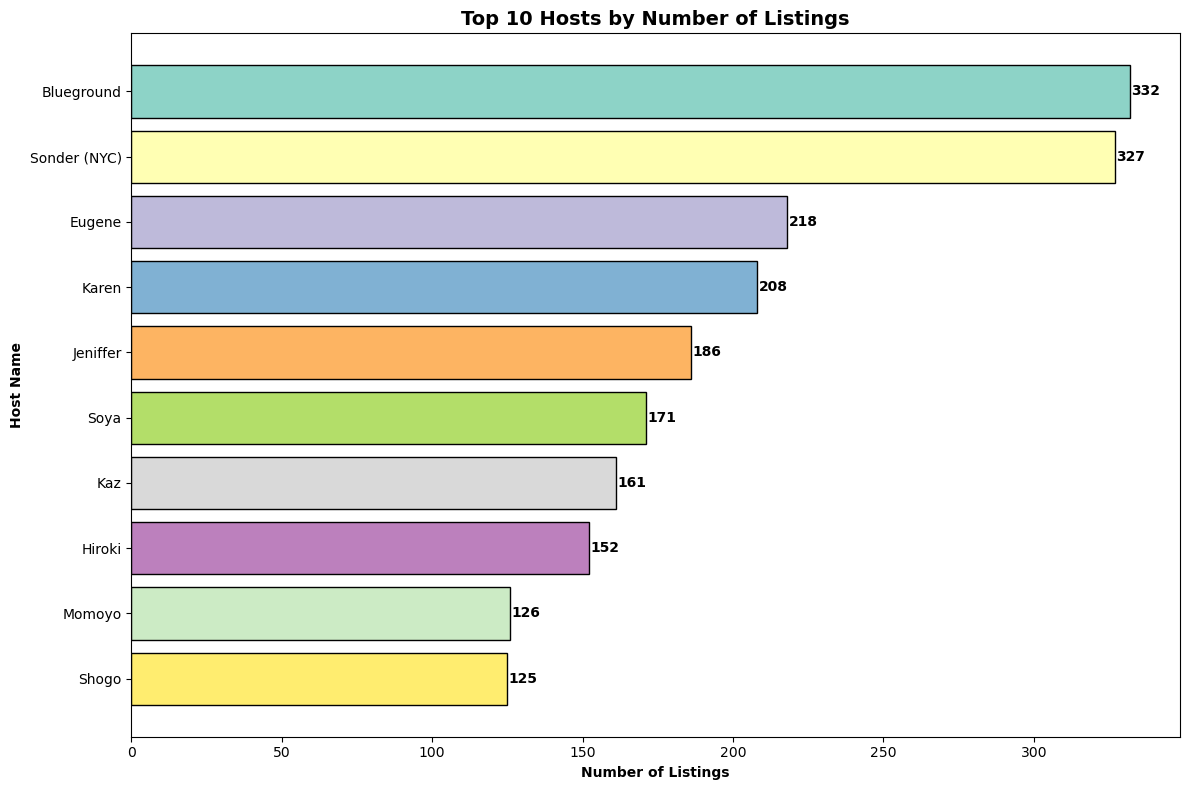

In [53]:
print("5. TOP 10 HOSTS BY CALCULATED HOST LISTINGS COUNT")
print("=" * 60)

if 'host name' in df_clean.columns and 'calculated host listings count' in df_clean.columns:
    # Group by host name and get the maximum listings count for each host
    top_hosts = (df_clean.groupby('host name')['calculated host listings count']
                 .max()
                 .sort_values(ascending=False)
                 .head(10))
    
    print("Top 10 hosts by number of listings:")
    for i, (host, count) in enumerate(top_hosts.items(), 1):
        print(f"{i:2d}. {host}: {count} listings")
    
    # Visualization
    plt.figure(figsize=(12, 8))
    colors = plt.cm.Set3(np.linspace(0, 1, len(top_hosts)))
    bars = plt.barh(range(len(top_hosts)), top_hosts.values, color=colors, edgecolor='black')
    
    plt.title('Top 10 Hosts by Number of Listings', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Listings', fontweight='bold')
    plt.ylabel('Host Name', fontweight='bold')
    plt.yticks(range(len(top_hosts)), top_hosts.index)
    
    # Add value labels on bars
    for bar, count in zip(bars, top_hosts.values):
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                str(int(count)), ha='left', va='center', fontweight='bold')
    
    plt.gca().invert_yaxis()  # Highest value at top
    plt.tight_layout()
    plt.show()

# 6. Are hosts with verified identities more likely to receive positive reviews?

### Question 6: Impact of host identity verification on review ratings

6. IMPACT OF HOST IDENTITY VERIFICATION ON REVIEW RATINGS
Review statistics by host verification status:
                         mean  median    std  count
host_identity_verified                             
unconfirmed             3.271     3.0  1.284  51233
verified                3.285     3.0  1.283  50825

 Statistical Test Results:
T-statistic: 1.745
P-value: 0.081
 No statistically significant difference in ratings


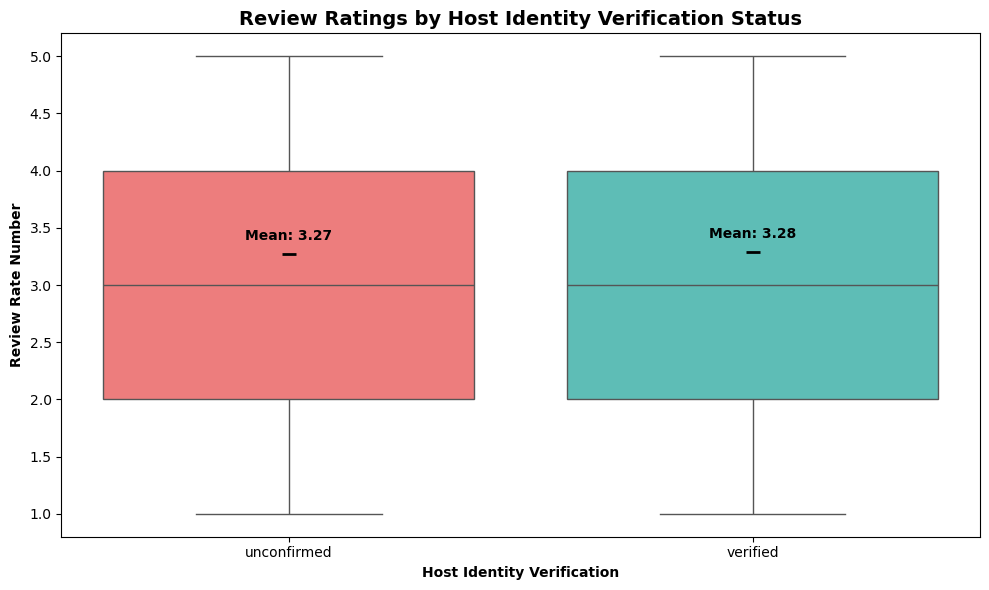

In [54]:
print("6. IMPACT OF HOST IDENTITY VERIFICATION ON REVIEW RATINGS")
print("=" * 70)

if 'host_identity_verified' in df_clean.columns and 'review rate number' in df_clean.columns:
    # Group by verification status
    verified_stats = df_clean.groupby('host_identity_verified')['review rate number'].agg([
        'mean', 'median', 'std', 'count'
    ]).round(3)
    
    print("Review statistics by host verification status:")
    print(verified_stats)
    
    # Perform statistical test
    verified = df_clean[df_clean['host_identity_verified'] == 'verified']['review rate number'].dropna()
    unverified = df_clean[df_clean['host_identity_verified'] == 'unconfirmed']['review rate number'].dropna()
    
    if len(verified) > 0 and len(unverified) > 0:
        t_stat, p_value = stats.ttest_ind(verified, unverified, equal_var=False)
        
        print(f"\n Statistical Test Results:")
        print(f"T-statistic: {t_stat:.3f}")
        print(f"P-value: {p_value:.3f}")
        
        if p_value < 0.05:
            print(" Statistically significant difference found!")
            if verified.mean() > unverified.mean():
                print("Verified hosts receive significantly higher ratings")
            else:
                print("Unverified hosts receive significantly higher ratings")
        else:
            print(" No statistically significant difference in ratings")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    
    # Box plot
    df_clean_box = df_clean[df_clean['host_identity_verified'].isin(['verified', 'unconfirmed'])]
    sns.boxplot(data=df_clean_box, x='host_identity_verified', y='review rate number', 
                palette=['#FF6B6B', '#4ECDC4'])
    plt.title('Review Ratings by Host Identity Verification Status', fontsize=14, fontweight='bold')
    plt.xlabel('Host Identity Verification', fontweight='bold')
    plt.ylabel('Review Rate Number', fontweight='bold')
    
    # Add mean markers
    means = df_clean_box.groupby('host_identity_verified')['review rate number'].mean()
    for i, (status, mean_val) in enumerate(means.items()):
        plt.scatter(i, mean_val, color='black', s=100, zorder=3, marker='_', linewidth=2)
        plt.text(i, mean_val + 0.1, f'Mean: {mean_val:.2f}', 
                ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# 7. Is there a correlation between the price of a listing and its service fee?

### Question 7: Correlation between price and service fee

7. CORRELATION BETWEEN PRICE AND SERVICE FEE
Correlation coefficient: 0.998
 Strong positive correlation: Higher prices strongly associated with higher service fees


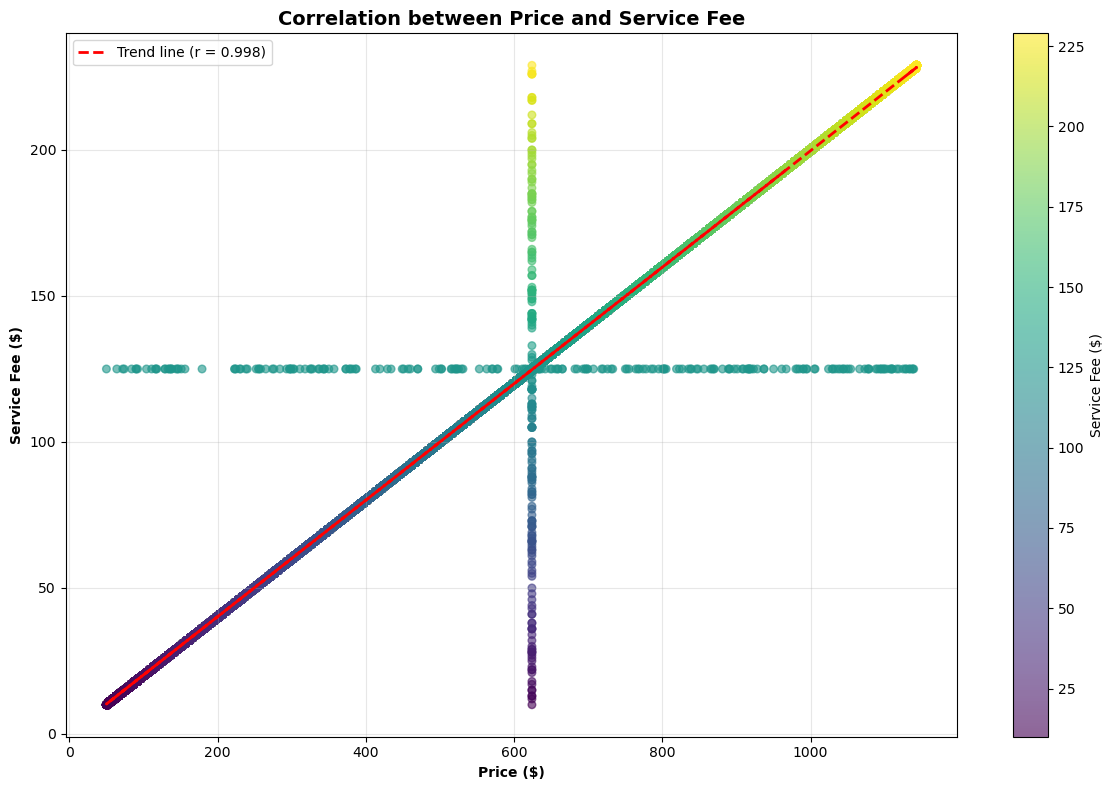


 Average service fee as percentage of price: 20.0%


In [55]:
print("7. CORRELATION BETWEEN PRICE AND SERVICE FEE")
print("=" * 60)

if 'price' in df_clean.columns and 'service fee' in df_clean.columns:
    # Calculate correlation
    correlation = df_clean['price'].corr(df_clean['service fee'])
    print(f"Correlation coefficient: {correlation:.3f}")
    
    if correlation > 0.7:
        print(" Strong positive correlation: Higher prices strongly associated with higher service fees")
    elif correlation > 0.3:
        print(" Moderate positive correlation: Higher prices moderately associated with higher service fees")
    elif correlation > 0:
        print(" Weak positive correlation: Slight association between higher prices and service fees")
    else:
        print(" No clear correlation")
    
    # Remove outliers for better visualization
    price_q95 = df_clean['price'].quantile(0.95)
    fee_q95 = df_clean['service fee'].quantile(0.95)
    filtered_df = df_clean[(df_clean['price'] <= price_q95) & (df_clean['service fee'] <= fee_q95)]
    
    # Visualization
    plt.figure(figsize=(12, 8))
    
    # Scatter plot with density colors
    scatter = plt.scatter(filtered_df['price'], filtered_df['service fee'], 
                         c=filtered_df['service fee'], cmap='viridis', alpha=0.6, s=30)
    
    # Add trend line
    z = np.polyfit(filtered_df['price'], filtered_df['service fee'], 1)
    p = np.poly1d(z)
    plt.plot(filtered_df['price'], p(filtered_df['price']), "r--", linewidth=2, 
             label=f'Trend line (r = {correlation:.3f})')
    
    plt.colorbar(scatter, label='Service Fee ($)')
    plt.title('Correlation between Price and Service Fee', fontsize=14, fontweight='bold')
    plt.xlabel('Price ($)', fontweight='bold')
    plt.ylabel('Service Fee ($)', fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Additional analysis: Service fee as percentage of price
    df_clean['fee_percentage'] = (df_clean['service fee'] / df_clean['price']) * 100
    avg_fee_percentage = df_clean['fee_percentage'].median()
    print(f"\n Average service fee as percentage of price: {avg_fee_percentage:.1f}%")

# 8. What is the average review rate number, and does it vary based on neighborhood group and room type?

###  Question 8: Average review rate and variation by neighborhood group and room type

8. AVERAGE REVIEW RATE AND VARIATION BY NEIGHBORHOOD GROUP AND ROOM TYPE
 Overall average review rate: 3.28/5

Review ratings by neighborhood group:
                      mean  count    std
neighbourhood group                     
brookln              4.000      1    NaN
Staten Island        3.401    949  1.252
Bronx                3.329   2694  1.209
Queens               3.329  13197  1.247
Manhattan            3.276  43586  1.289
Brooklyn             3.258  41630  1.293
manhatan             3.000      1    NaN

Review ratings by room type:
                  mean  count    std
room type                           
Hotel room       3.539    115  1.134
Shared room      3.304   2208  1.240
Private room     3.280  46306  1.281
Entire home/apt  3.274  53429  1.287

Average review rates by neighborhood group and room type:
room type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood group                                                        
Bronx              

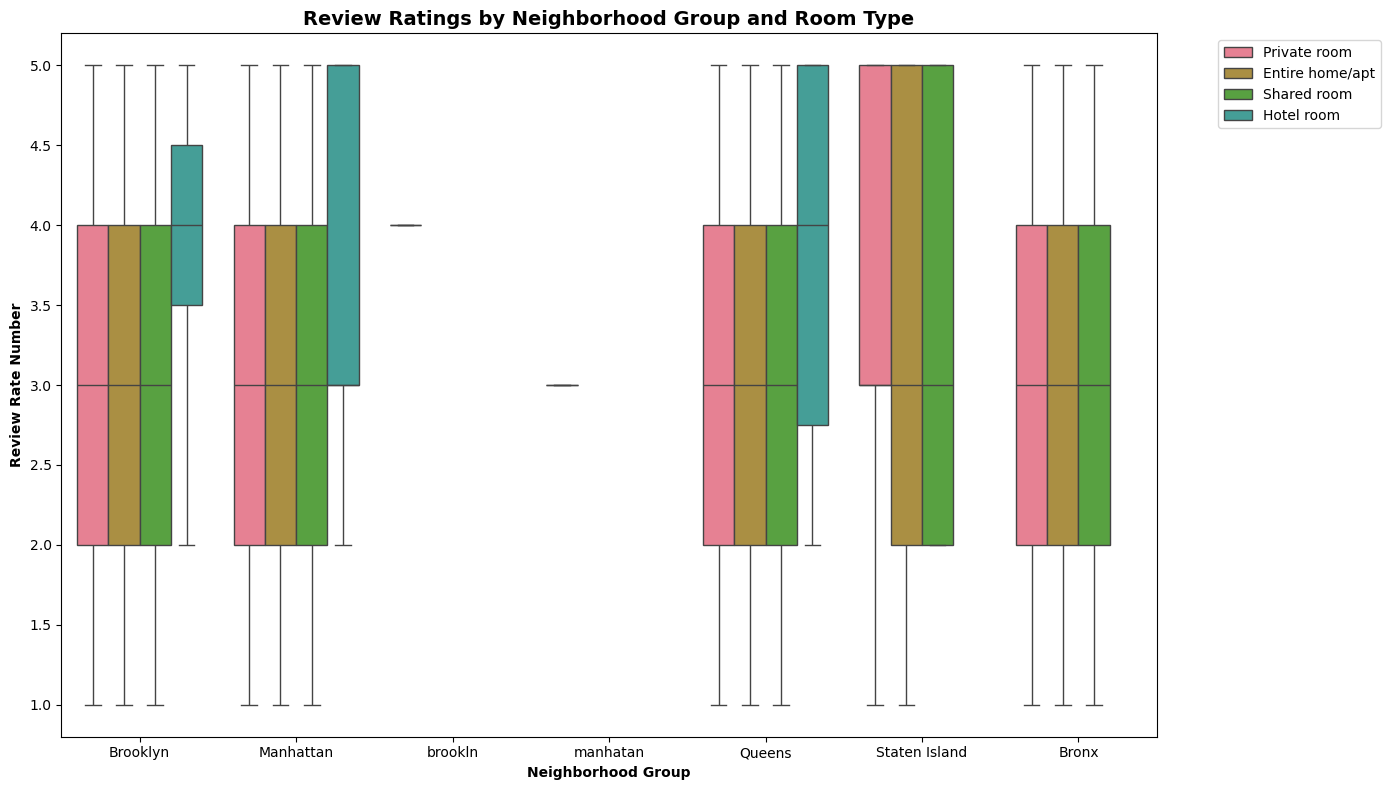

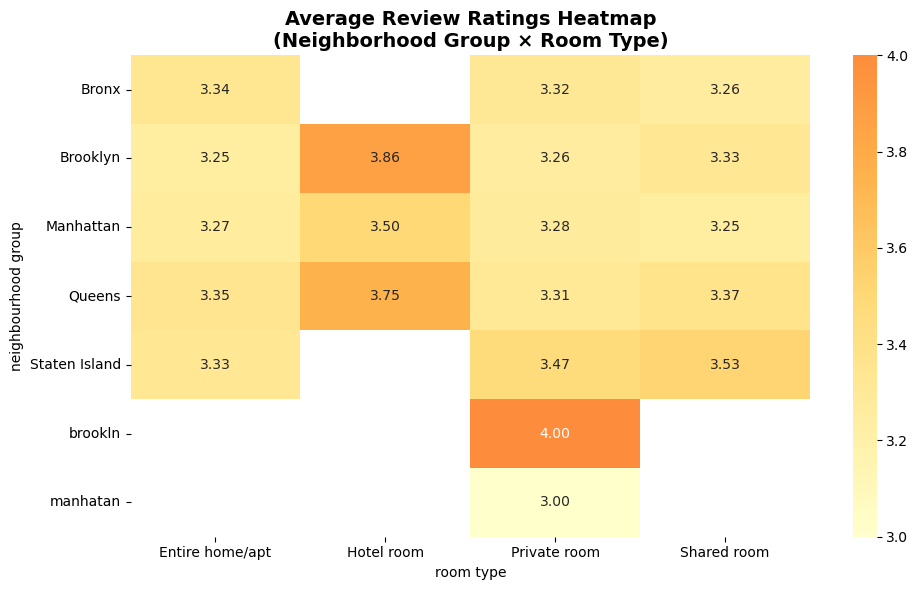

In [56]:
print("8. AVERAGE REVIEW RATE AND VARIATION BY NEIGHBORHOOD GROUP AND ROOM TYPE")
print("=" * 80)

if 'review rate number' in df_clean.columns:
    overall_avg = df_clean['review rate number'].mean()
    print(f" Overall average review rate: {overall_avg:.2f}/5")

if 'neighbourhood group' in df_clean.columns and 'room type' in df_clean.columns and 'review rate number' in df_clean.columns:
    # Analysis by neighborhood group
    neighborhood_reviews = df_clean.groupby('neighbourhood group')['review rate number'].agg([
        'mean', 'count', 'std'
    ]).round(3).sort_values('mean', ascending=False)
    
    print("\nReview ratings by neighborhood group:")
    print(neighborhood_reviews)
    
    # Analysis by room type
    roomtype_reviews = df_clean.groupby('room type')['review rate number'].agg([
        'mean', 'count', 'std'
    ]).round(3).sort_values('mean', ascending=False)
    
    print("\nReview ratings by room type:")
    print(roomtype_reviews)
    
    # Combined analysis using pivot table
    pivot_reviews = df_clean.pivot_table(
        values='review rate number', 
        index='neighbourhood group', 
        columns='room type', 
        aggfunc='mean'
    ).round(2)
    
    print("\nAverage review rates by neighborhood group and room type:")
    print(pivot_reviews)
    
    # Visualization 1: Box plot by neighborhood group and room type
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_clean, x='neighbourhood group', y='review rate number', hue='room type')
    plt.title('Review Ratings by Neighborhood Group and Room Type', fontsize=14, fontweight='bold')
    plt.xlabel('Neighborhood Group', fontweight='bold')
    plt.ylabel('Review Rate Number', fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Visualization 2: Heatmap of average ratings
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_reviews, annot=True, cmap='YlOrRd', center=4.0, fmt='.2f')
    plt.title('Average Review Ratings Heatmap\n(Neighborhood Group × Room Type)', 
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# 9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

### Question 9: Relationship between host listings count and availability

9. RELATIONSHIP BETWEEN HOST LISTINGS COUNT AND AVAILABILITY
Correlation coefficient: 0.159
 Weak or no correlation between listings count and availability

Average availability by host listings count category:
                         mean  median  count    std
host_listings_category                             
1                       114.7    63.0  63440  129.3
2-5                     158.9   137.0  26422  132.0
6-10                    225.9   263.0   4464  124.4
11-50                   251.5   299.0   4106  117.6
51-100                  257.1   308.0   1574  113.8
100+                    220.0   250.5   2052  118.7


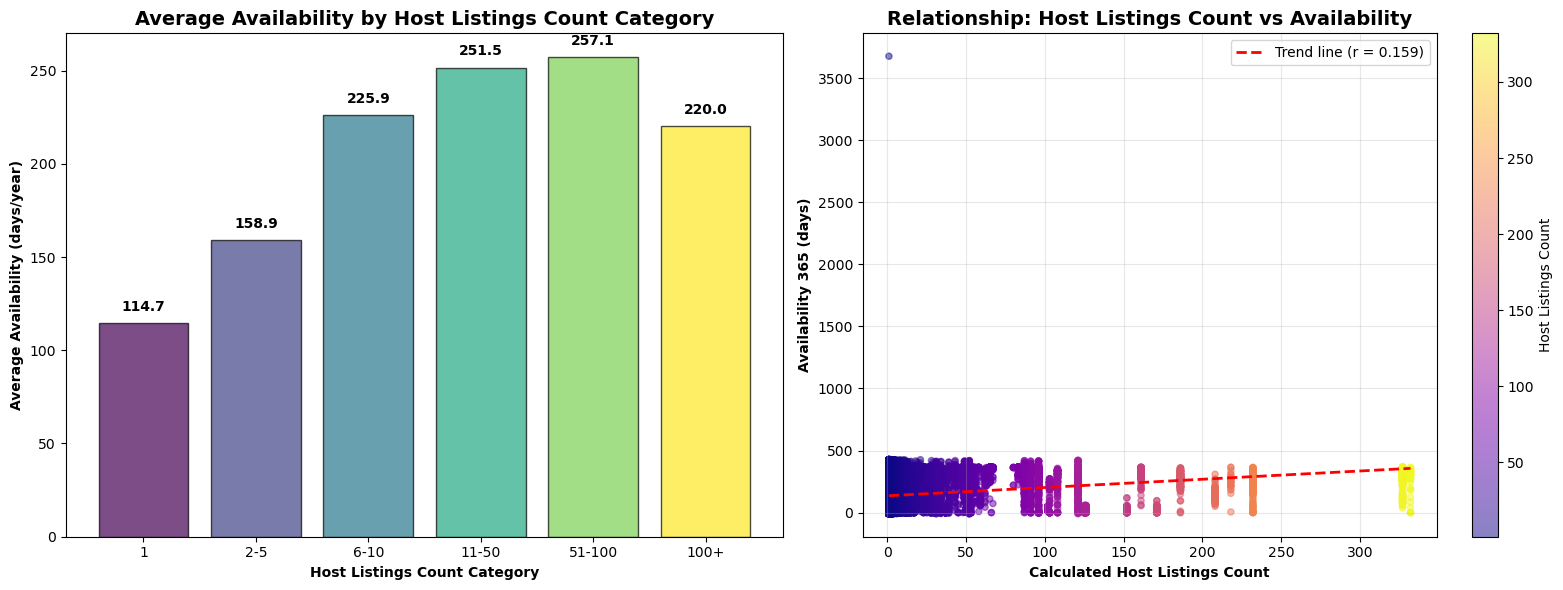

In [57]:
print("9. RELATIONSHIP BETWEEN HOST LISTINGS COUNT AND AVAILABILITY")
print("=" * 80)

if 'calculated host listings count' in df_clean.columns and 'availability 365' in df_clean.columns:
    # Calculate correlation
    correlation = df_clean['calculated host listings count'].corr(df_clean['availability 365'])
    print(f"Correlation coefficient: {correlation:.3f}")
    
    if correlation > 0.3:
        print(" Positive correlation: Hosts with more listings tend to have higher availability")
    elif correlation < -0.3:
        print(" Negative correlation: Hosts with more listings tend to have lower availability")
    else:
        print(" Weak or no correlation between listings count and availability")
    
    # Create categories for host listings count
    df_clean['host_listings_category'] = pd.cut(
        df_clean['calculated host listings count'], 
        bins=[0, 1, 5, 10, 50, 100, df_clean['calculated host listings count'].max()],
        labels=['1', '2-5', '6-10', '11-50', '51-100', '100+']
    )
    
    # Calculate average availability by category
    availability_by_listings = df_clean.groupby('host_listings_category')['availability 365'].agg([
        'mean', 'median', 'count', 'std'
    ]).round(1)
    
    print("\nAverage availability by host listings count category:")
    print(availability_by_listings)
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar plot for average availability
    categories = availability_by_listings.index
    means = availability_by_listings['mean']
    
    bars = ax1.bar(categories, means, color=plt.cm.viridis(np.linspace(0, 1, len(categories))),
                   alpha=0.7, edgecolor='black')
    
    ax1.set_title('Average Availability by Host Listings Count Category', 
                  fontsize=14, fontweight='bold')
    ax1.set_xlabel('Host Listings Count Category', fontweight='bold')
    ax1.set_ylabel('Average Availability (days/year)', fontweight='bold')
    
    # Add value labels on bars
    for bar, mean_val in zip(bars, means):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                f'{mean_val:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # Scatter plot with trend line
    scatter = ax2.scatter(df_clean['calculated host listings count'], 
                         df_clean['availability 365'], 
                         alpha=0.5, s=20, c=df_clean['calculated host listings count'], 
                         cmap='plasma')
    
    # Add trend line
    z = np.polyfit(df_clean['calculated host listings count'], df_clean['availability 365'], 1)
    p = np.poly1d(z)
    x_range = np.linspace(df_clean['calculated host listings count'].min(), 
                         df_clean['calculated host listings count'].max(), 100)
    ax2.plot(x_range, p(x_range), "r--", linewidth=2, 
             label=f'Trend line (r = {correlation:.3f})')
    
    ax2.set_title('Relationship: Host Listings Count vs Availability', 
                  fontsize=14, fontweight='bold')
    ax2.set_xlabel('Calculated Host Listings Count', fontweight='bold')
    ax2.set_ylabel('Availability 365 (days)', fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.colorbar(scatter, ax=ax2, label='Host Listings Count')
    plt.tight_layout()
    plt.show()

# Summary Statistics and Key Insights

In [58]:
# Comprehensive Summary
print("COMPREHENSIVE SUMMARY AND KEY INSIGHTS")
print("=" * 50)

# Basic statistics
print("\n BASIC STATISTICS:")
print(f"Total number of listings: {len(df_clean):,}")
print(f"Average price: ${df_clean['price'].mean():.2f}")
print(f"Median price: ${df_clean['price'].median():.2f}")
print(f"Average review rating: {df_clean['review rate number'].mean():.2f}/5")
print(f"Average availability: {df_clean['availability 365'].mean():.1f} days per year")

# Most common values
if 'room type' in df_clean.columns:
    most_common_room = df_clean['room type'].value_counts().index[0]
    room_percentage = (df_clean['room type'].value_counts().iloc[0] / len(df_clean)) * 100
    print(f"Most common room type: {most_common_room} ({room_percentage:.1f}%)")

if 'neighbourhood group' in df_clean.columns:
    most_common_area = df_clean['neighbourhood group'].value_counts().index[0]
    area_percentage = (df_clean['neighbourhood group'].value_counts().iloc[0] / len(df_clean)) * 100
    print(f"Most common neighborhood group: {most_common_area} ({area_percentage:.1f}%)")

# Host analysis
if 'host_identity_verified' in df_clean.columns:
    verified_percentage = (df_clean['host_identity_verified'] == 'verified').mean() * 100
    print(f"Percentage of verified hosts: {verified_percentage:.1f}%")

# Review analysis
print(f"\n REVIEW ANALYSIS:")
print(f"Total number of reviews: {df_clean['number of reviews'].sum():,}")
print(f"Average reviews per month: {df_clean['reviews per month'].mean():.2f}")
print(f"Properties with no reviews: {(df_clean['number of reviews'] == 0).sum()}")

# Price distribution analysis
print(f"\n PRICE DISTRIBUTION:")
print(f"Minimum price: ${df_clean['price'].min():.2f}")
print(f"Maximum price: ${df_clean['price'].max():.2f}")
print(f"25th percentile: ${df_clean['price'].quantile(0.25):.2f}")
print(f"75th percentile: ${df_clean['price'].quantile(0.75):.2f}")
print(f"Standard deviation: ${df_clean['price'].std():.2f}")

COMPREHENSIVE SUMMARY AND KEY INSIGHTS

 BASIC STATISTICS:
Total number of listings: 102,058
Average price: $625.35
Median price: $624.00
Average review rating: 3.28/5
Average availability: 140.8 days per year
Most common room type: Entire home/apt (52.4%)
Most common neighborhood group: Manhattan (42.7%)
Percentage of verified hosts: 49.8%

 REVIEW ANALYSIS:
Total number of reviews: 2,804,672.0
Average reviews per month: 1.28
Properties with no reviews: 15673

 PRICE DISTRIBUTION:
Minimum price: $50.00
Maximum price: $1200.00
25th percentile: $341.00
75th percentile: $912.00
Standard deviation: $331.27


## Final Comprehensive Visualization

FINAL COMPREHENSIVE VISUALIZATION


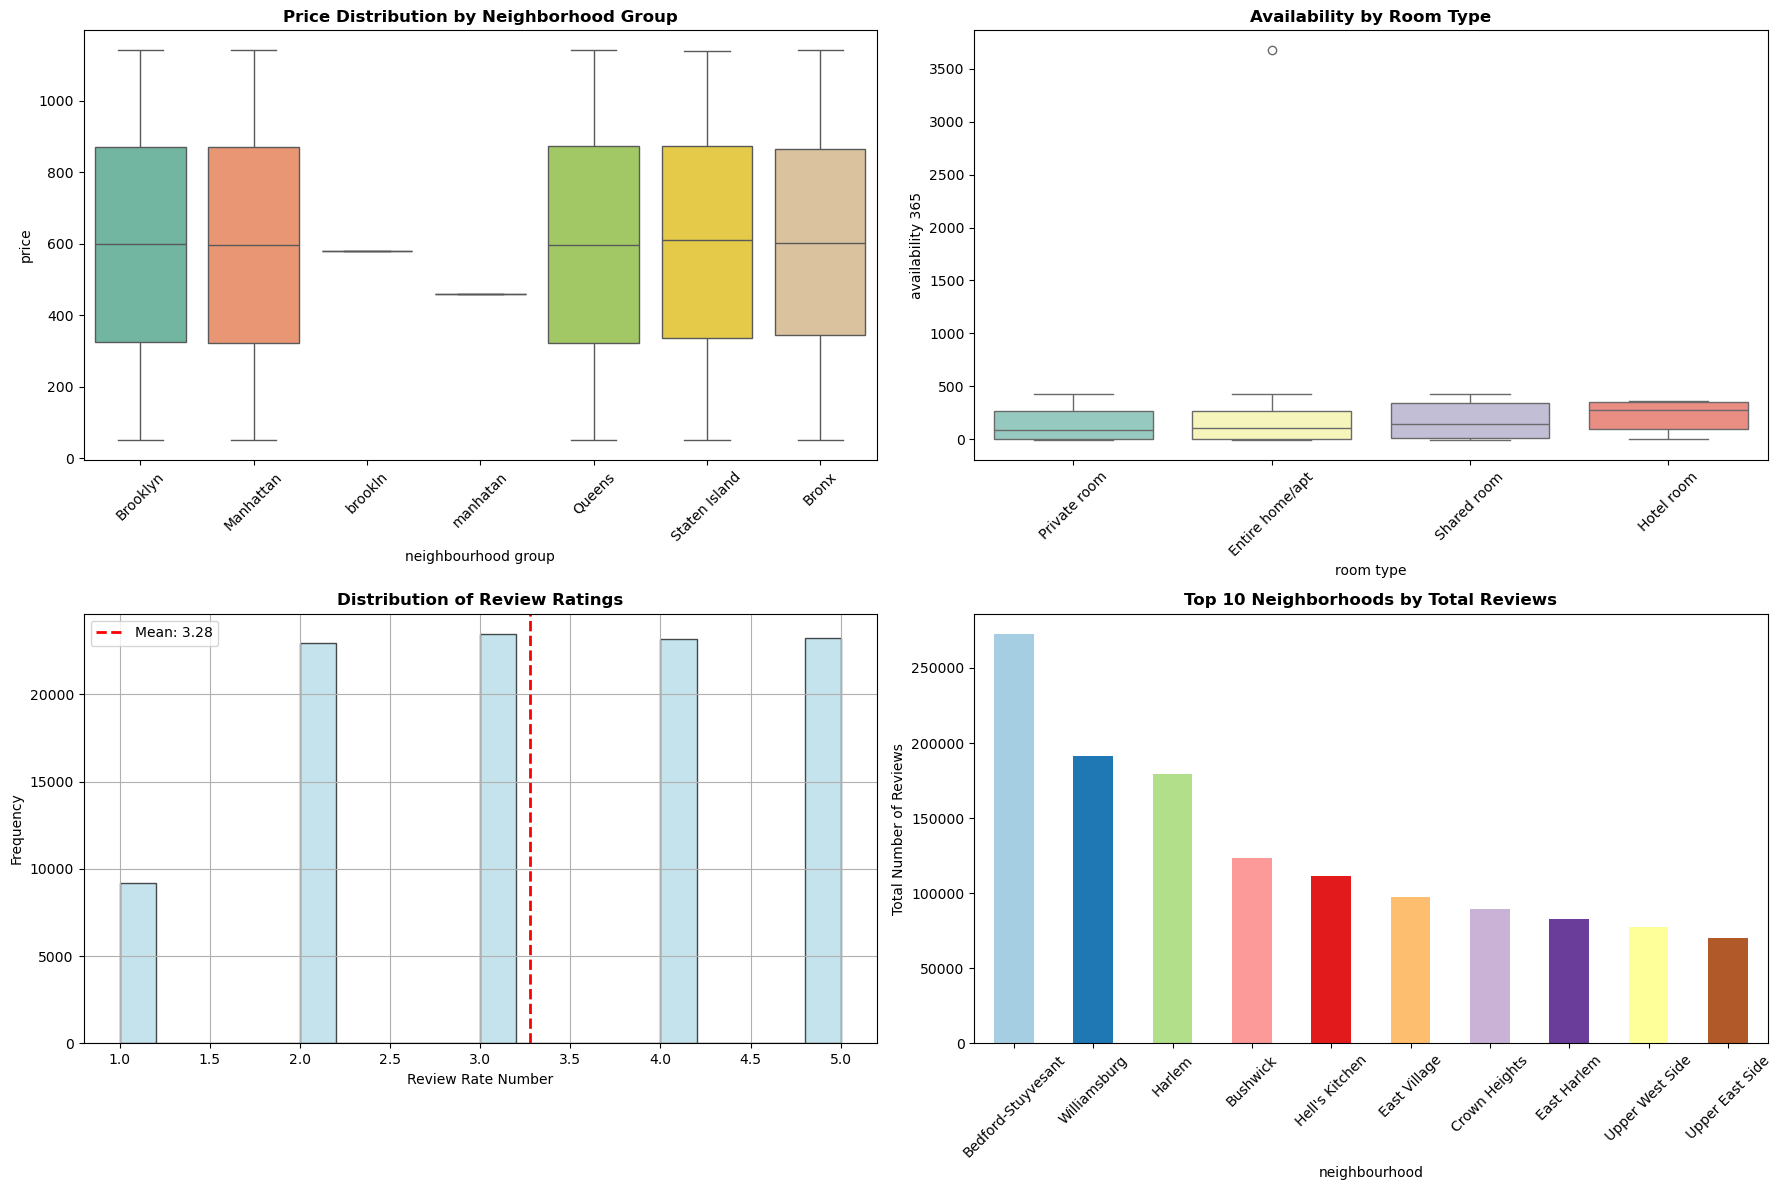

In [59]:
# Final Comprehensive Visualization
print("FINAL COMPREHENSIVE VISUALIZATION")
print("=" * 40)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Price distribution by neighborhood group
if 'neighbourhood group' in df_clean.columns and 'price' in df_clean.columns:
    price_q95 = df_clean['price'].quantile(0.95)
    filtered_prices = df_clean[df_clean['price'] <= price_q95]
    sns.boxplot(data=filtered_prices, x='neighbourhood group', y='price', ax=axes[0,0], palette='Set2')
    axes[0,0].set_title('Price Distribution by Neighborhood Group', fontweight='bold')
    axes[0,0].tick_params(axis='x', rotation=45)

# 2. Availability by room type
if 'room type' in df_clean.columns and 'availability 365' in df_clean.columns:
    sns.boxplot(data=df_clean, x='room type', y='availability 365', ax=axes[0,1], palette='Set3')
    axes[0,1].set_title('Availability by Room Type', fontweight='bold')
    axes[0,1].tick_params(axis='x', rotation=45)

# 3. Review ratings distribution
if 'review rate number' in df_clean.columns:
    df_clean['review rate number'].hist(bins=20, ax=axes[1,0], color='lightblue', 
                                       edgecolor='black', alpha=0.7)
    axes[1,0].axvline(df_clean['review rate number'].mean(), color='red', 
                     linestyle='--', linewidth=2, label=f'Mean: {df_clean["review rate number"].mean():.2f}')
    axes[1,0].set_title('Distribution of Review Ratings', fontweight='bold')
    axes[1,0].set_xlabel('Review Rate Number')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].legend()

# 4. Top 10 most reviewed neighborhoods
if 'neighbourhood' in df_clean.columns and 'number of reviews' in df_clean.columns:
    top_neighborhoods = (df_clean.groupby('neighbourhood')['number of reviews']
                        .sum()
                        .sort_values(ascending=False)
                        .head(10))
    top_neighborhoods.plot(kind='bar', ax=axes[1,1], color=plt.cm.Paired(np.linspace(0, 1, 10)))
    axes[1,1].set_title('Top 10 Neighborhoods by Total Reviews', fontweight='bold')
    axes[1,1].tick_params(axis='x', rotation=45)
    axes[1,1].set_ylabel('Total Number of Reviews')

plt.tight_layout()
plt.show()

# Conclusion
In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dlynamics, host, and review analysis.Key findings include the dominance in counts of Entire homelapt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verifed host status on review rates, as well as the strong correlation between listing price and service fee. Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industy.